In [1]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cluster import MeanShift, estimate_bandwidth

# ファイルからデータを読み込む
input_file = 'sales.csv' 
file_reader = csv.reader(open(input_file, 'r'), delimiter=',') 

X = [] 
for count, row in enumerate(file_reader): 
    if not count: 
        names = row[1:] 
        continue 
    X.append([float(x) for x in row[1:]]) 

# numpy 配列に変換する
X = np.array(X) 

bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X)) 

meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True) 
meanshift_model.fit(X) 

labels = meanshift_model.labels_ 
cluster_centers = meanshift_model.cluster_centers_ 
num_clusters = len(np.unique(labels)) 

print("Number of clusters in input data =", num_clusters) 

print("\nCenters of clusters:") 
print('\t'.join([name[:7] for name in names])) 
for cluster_center in cluster_centers: 
    print('\t'.join([str(int(x)) for x in cluster_center])) 

Number of clusters in input data = 9

Centers of clusters:
Tshirt	Tank to	Halter 	Turtlen	Tube to	Sweater
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
28333	34263	24065	5575	4229	18076
22617	77873	32543	1005	21035	837
14987	46397	97393	1127	37315	3235
7852	4939	63081	134	40066	1332


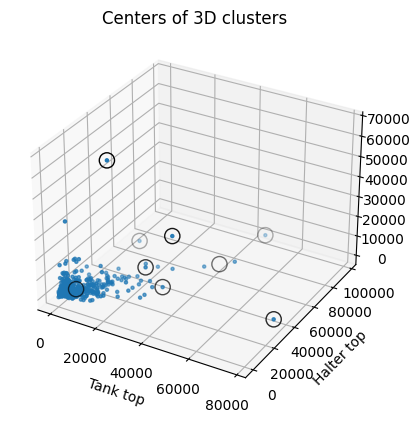

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d') 
x = 1
y = 2
z = 3

ax.scatter(X[:,x], X[:,y], X[:,z], marker='.')
ax.scatter(cluster_centers[:,x], cluster_centers[:,y], cluster_centers[:,z], 
        s=120, edgecolors='black', facecolors='none') 

plt.title('Centers of 3D clusters') 
plt.xlabel(names[x])
plt.ylabel(names[y])
plt.show() 